In [ ]:
import os
import numpy as np
import cv2
import pickle

dir = "train"
categories = ["cat","dog"]
data = []

for category in categories:
    path = os.path.join(dir,category)
    label = categories.index(category)

    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        pet_img = cv2.imread(imgpath,0)
        try:
            pet_img = cv2.resize(pet_img,(50,50))
            image = np.array(pet_img).flatten()
            data.append([image,label])
        except Exception as e:
            pass



In [10]:
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

random.shuffle(data)
features = []
labels = []

for feature, label in data:
    features.append(feature)
    labels.append(label)
    
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size= 0.80)
model = SVC(C=1, kernel="poly", gamma="auto")
model.fit(xtrain, ytrain)

pick = open("model.sav", "wb")
pickle.dump(model, pick)
pick.close()


Accuracy: 0.57275
Prediction cat


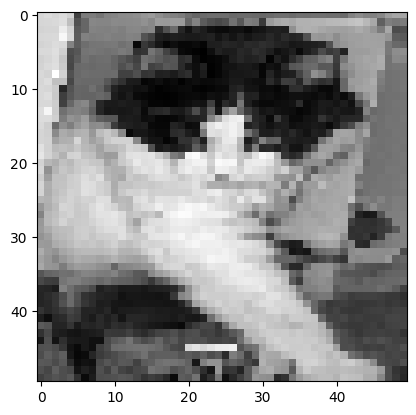

In [11]:
import matplotlib.pyplot as plt

pick = open("model.sav", "rb")
model = pickle.load(pick)
pick.close()

prediction = model.predict(xtest)
accuracy = model.score(xtest, ytest)

print("Accuracy:", accuracy)
print("Prediction", categories[prediction[0]])
mypet = xtest[0].reshape(50,50)
plt.imshow(mypet, cmap="gray")
plt.show()